## Part 3

Let us look at few unsupervised learning algorithms and the popular supervised learning algorithm called Neural Networks. Check out <a href="https://github.com/savan77/Practical-Machine-Learning-With-Python/">Github repository</a> of this series for more.</p>

<h3 style="font-family:verdana; margin-left:30px">Index</a></h3>
<ul>
<li> <p style="font-family:verdana; font-size:15px">
 K-nearest neighbors </p></li>
 <li><p style="font-family:verdana; font-size:15px">
 K-means Clustering</p></li>
 <li><p style="font-family:verdana; font-size:15px">
 Principal Component Analysis</p></li>
 <li><p style="font-family:verdana; font-size:15px">
 Neural Networks</p></li>
 </ul>

# K-nearest neighbors

<p style="font-family:verdana; font-size:15px">K-nearest neighbors(KNN for short) is one of the simplest Machine Learning algorithm. KNN is a supervised learning algorithm which can be used for both classification and regression. This is slightly different from the algorithms that we have seen so far. Let me explain this algorithm with an example of classification problem.
</p><p style="font-family:verdana; font-size:15px">
First step in KNN is to plot training data in a feature space. For simplicity, let us plot a sample training data in two dimensional space as shown below. Please note, in this example we have two possible classes-<i>green</i> and <i>red</i>.</p>
![title](../images/knn6.png)
<p style="font-family:verdana; font-size:15px"> There is no explicit training phase in KNN. Our model simply memorizes these points. KNN is a lazy learner, that is, it does not use training data to do any generalization. Given any data point in a feature space we classify that point by taking into account the class of <b> k </b> nearest data points. For example, if we want to classify blue point as shown in following figure- we consider <b>k</b> nearest data points and we assign a class by majority role.</p>
![title](../images/knn2.png)
<p style="font-family:verdana; font-size:15px"> Let us take <b> k = 3 </b> as shown below. </p>
![title](../images/knn3.png)
<p style="font-family:verdana; font-size:15px"> As we can see, there are <i> two data points with green class</i> and <i> one data point with red class </i>. Hence, we <b> assign green class to new point(blue)</b>.</p>
<p style="font-family:verdana; font-size:15px"> Just to make it concrete let us take an another example. Let us change the position of new point(blue point) as shown below.</p>
![title](../images/knn4.png) 
<p style="font-family:verdana; font-size:15px"> If we take <b>k = 5</b> then we get four neighbors with red class and one neighbor with green class. Hence, new point will be classified as red point.
</p>
![title](../images/knn5.png)


<p style="font-family:verdana; font-size:15px"> <b> In case of regression</b>(when output/dependent variable is any real value), output will be an average of K nearest neighbors.</p>
<p style="font-family:verdana; font-size:15px"> But wait, <i> How do we decide the value for K?</i> and How to measure the distance between data points?</i>. A small value of k means that noise will have a higher influence on the result and large value makes it computationally expensive. A rule of thumb is to set k equals to the square root of total number of data points. I will recommend to test your model for various K values. You can use <a href="https://savan77.github.io/blog/machine-learning-part1.html#crossval">cross-validation</a> to find out best k value. For more on choosing best value of k, refer <a href="https://stats.stackexchange.com/questions/126051/choosing-optimal-k-for-knn">this stackoverflow</a> thread.

<p style="font-family:verdana; font-size:15px"> There are various options available for distance metric such as euclidian or manhattan distance. Generally used metric is <b>Euclidian distance</b>. </p>
![title](../images/knn7.png)

<p style="font-family:verdana; font-size:15px"> Minkowski is the generalization of Euclidian and Manhattan distance. Now, let us implement KNN algorithm using scikit-learn.</p>

## Load the dataset

In [1]:
from sklearn.datasets import load_iris
dataset = load_iris()
X = dataset.data
y = dataset.target

## Perform preprocessing

In [2]:
#standardize the data to make sure each feature contributes equally to the distance
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_processed = ss.fit_transform(X)

In [3]:
#split the dataset into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=42)

## Fit the dataset

In [4]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 5, metric="minkowski", p=2) #p=2 for euclidian distance
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [5]:
model.score(X_test, y_test)

1.0

<p style="font-family:verdana; font-size:15px"> Before moving on to the next topic, let us talk about parametric and non-parametric models. In parametric model, we continously update parameters(finite) to learn a function which can classify new data point without requiring the training data(i.e Logistic Regression). In non-parametric model, number of parameters grows with the number of training data(i.e KNN). </p>

# K-means Clustering

<p style="font-size:15px; font-family:verdana"> K-means is one of the simplest unsupervised learning algorithm used for clustering problem. Clustering is a process that finds groups of similar objects. So, in clustering our goal is to group objects based on their features similarity. K-means clutering is very easy to understand, very easy to implement and computationally efficient clutering algorithm. Now, let us see how it works.</p>
<p style="font-size:15px; font-family:verdana"> Basic idea behind K-means is, we define <b> k centroids</b>, that is, one for each cluster. Here, k is the hyperparameter and we should be very careful about it. Usually, you should try range of values to determine best value of k. Where do we place them initially? Common choice is to place them as fas ar possible. Now, assign each data point to the nearest centroid. Once each data point has been assigned to one of the centroids, our next step is to recalculate k new centroids. How do we do that? We do it by moving centroid(old) to the center of the data samples that were assigned to it. And how do we do find center? We find it by taking the mean of data points in a particular cluster.</p>

<p style="font-size:15px; font-family:verdana"> K-means clutering aims to find positions $ \mu_i $, i=1,2,..,k of the clusters the minimize the distance from the data points to the cluster. Mathematically, we can write this as:</p>
![title](..\images\sed.png)

In [6]:
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

digits = load_digits()
dataset = digits.data

#standardize
ss = StandardScaler()
dataset = ss.fit_transform(dataset)

model = KMeans(n_clusters= 10, init="k-means++", n_init=10)
model.fit(dataset)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [7]:
model.labels_   #assigned label(cluster) to each data point

array([0, 9, 9, ..., 9, 3, 3])

In [8]:
model.inertia_  #sum of distances of samples to their closest centroid

69422.941195144551

In [9]:
model.cluster_centers_


array([[  0.00000000e+00,  -3.10238752e-01,  -2.06177764e-01,
          3.03168840e-01,  -1.40191740e-01,  -5.03966912e-01,
         -3.99585759e-01,  -1.25022923e-01,  -5.90775571e-02,
         -3.46211086e-01,   4.17672645e-01,   3.49905412e-01,
          2.38843406e-01,   5.24264003e-01,  -2.45478180e-01,
         -1.30433381e-01,  -4.46250733e-02,   3.20429312e-01,
          7.71457454e-01,  -2.98969956e-01,  -8.06601146e-01,
          6.93198664e-01,   5.32051362e-01,  -1.14221844e-01,
         -3.33797263e-02,   9.07972853e-01,   5.85143100e-01,
         -1.15219864e+00,  -1.57661191e+00,   2.57254863e-01,
          1.12870850e+00,  -4.72323823e-02,   0.00000000e+00,
          1.02784152e+00,   6.15056355e-01,  -1.30867433e+00,
         -1.73098189e+00,   5.32680477e-03,   1.20443628e+00,
          0.00000000e+00,  -6.13436689e-02,   6.54131511e-01,
          9.81663232e-01,  -8.72074591e-01,  -9.95308509e-01,
          5.43552357e-01,   5.58944660e-01,  -8.87416172e-02,
        

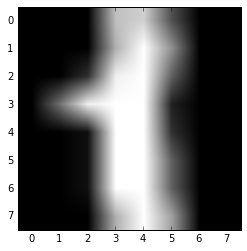

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(digits.images[1], cmap='gray')

In [11]:
model.predict(dataset[1].reshape(1,-1)) #should be one

array([9])

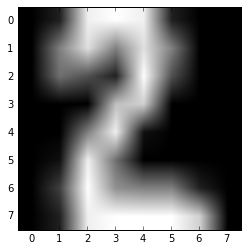

In [12]:
#lets try again
plt.imshow(digits.images[333], cmap='gray')

In [13]:
model.predict(dataset[333].reshape(1,-1))  #should be 2

array([6])

# Principal Component Analysis

<p style="font-size:15px; font-family:verdana">Principal Component Analysis is a linear dimensionality reduction algorithm. Before moving forward, it's important to mention the <b>curse of dimensionality</b>. Curse of dimensionality refers to how certain algorithms perform poorly on high-dimensional data. High dimensionality makes clustering hard, because having lots of dimensions means that everything is far away from each other. It's hard to know what true distance means when you have so many dimensions.</p>

<p style="font-size:15px; font-family:verdana"> Reducing the dimensions is same as reducing the features of a dataset. We can do this by <i>feature selection</i> or <i>feature extraction</i>. PCA is a feature extraction technique, that is, we project original dataset(with high-dimensionality) onto a new feature space(with low-dimensionality). We can also think of it as a data compression technique while maintaining the most relevant information. PCA aims to find the directions of maximum variance in high-dimensional data and project it onto a new subspace with fewer dimensions. <br><br>Given the input data X(d-dimensional), we want to find a projection matrix (P) such that X.W = N (n-dimensional) and please note <b> n <= d </b>. We construct project matrix P using eigenvectors. Eigenvectors can be calculated by decomposing a covariance matrix or we can perform <a href="https://en.wikipedia.org/wiki/Singular_value_decomposition">singular value decomposition</a>. One important thing to note here is that PCA is sensitive to data scale, hence we should standardize data before going through PCA. We can summarize this process as follows: </p>
<ul>
    <li style="font-size:15px; font-family:verdana"> Standardize the dataset.</li>
    <li style="font-size:15px; font-family:verdana"> Find eigenvector and eigenvalues by decomposing a covariance matrix or use singular value decomposition.</li>
    <li style="font-size:15px; font-family:verdana"> Sort eignevalues in descending order and select n eigenvectors corresponding to n largest eigenvalues.</li>
    <li style="font-size:15px; font-family:verdana"> Construct the projection matrix P from eigenvectors.</li>
    <li style="font-size:15px; font-family:verdana"> Project dataset X onto low-dimensional space by multiplying X and W</li>

In [14]:
from sklearn.decomposition import PCA
import numpy as np

#lets create features
x1 = np.random.normal(size=200) 
x2 = np.random.normal(size=200)
x3 = x1 + x2  #not useful since its highly correlated with other features.
X = np.c_[x1,x2,x3]

pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [15]:
pca.explained_variance_   #third feature is clearly useless

array([  2.96131853e+00,   1.06196635e+00,   3.34168017e-32])

In [16]:
pca.n_components_  #still 3, because we have not specify no of components to keep in PCA() method

3

In [17]:
pca2 = PCA(n_components=2)
pca2.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [18]:
pca2.n_components_


2

In [19]:
X_processed = pca2.fit_transform(X)

In [20]:
X.shape

(200, 3)

In [21]:
X_processed.shape

(200, 2)

<p style="font-family:verdana; font-size:15px"> PCA is not the only Dimensionality Reduction algorithm. Check out <a href="https://en.wikipedia.org/wiki/Linear_discriminant_analysis">Linear Discriminant Analysis</a>.

# Neural Networks

<p style="font-family:verdana; font-size:15p"> Neural Networks are very powerful supervised learning algorithms which can be used for Classification as well as Regression problems. In most cases, we have classification problem. It won't be wrong to say Neural Networks are the reason behind the hype of Machine Learning. Neural Networks or Artificial Neural Networks are also known as <b> Universal Function Approximator</b>. Read <a href="http://neuralnetworksanddeeplearning.com/chap4.html">this</a> chapter of <a href="http://neuralnetworksanddeeplearning.com">neural networks and deep learning</a> book. In this part, we will see what is neural networks, and how they work. Also, we will implement Neural Network using <a href="https://www.tensorflow.org/">TensorFlow</a>.</p>

<p style="font-family:verdana; font-size:15px"> Neural Network is an information processing system, that is, we pass some input to the Neural Network, some processing happens and we get some output. Neural Networks are inspired from biological connection of neurons and how information processing happens in the brain. For more on biological neural networks see <a href="http://www.ece.utep.edu/research/webfuzzy/docs/kk-thesis/kk-thesis-html/node10.html">here</a> and <a href="https://cs.stanford.edu/people/eroberts/courses/soco/projects/neural-networks/Biology/index.html">here</a>. Very simple architecture of a neural network is shown below.</p>
![title](../images/nn1.png)

<p style="font-family:verdana; font-size:15px"> Neural Network is made up of many neurons. We can think of each neuron as a single processing unit which accepts some input and produces some output. As we can see in above figure, there are three layers-<i>input layer, hidden layer and output layer</i>. You might have one question-why it is called hidden? The answer is- it's called hidden because it's not visible(preceded by input layer and followed by output layer). Each edge you see in figure has some weight associated with it. We can think of it as a importance of a particular feature. </p>

<p style="font-family:verdana; font-size:15px"> We pass input vector/matrix to the input layer then it will be multiplied by a weight matrix. Then it will be passed through an <b> activation function </b> which is used to introduce non-linearity into the network. If we use sigmoid activation function then input value will be squashed in between [0,1] and in case of tanh - [-1,1]. Common choices for activation functions are :</p>
![title](../images/nn3.png)

<p style="font-family:verdana; font-size:15px"> Commonly used activation function is Relu since it has come nice property such as fast to converge and it also helps in regularization. Also, <b> SELU (Scaled Exponential Linear Unit)</b>, which recently came into the play, has started getting a lot of buzz. Check out <a href="https://github.com/bioinf-jku/SNNs">this Github repo</a> for implementation and comparison of SELU with other activation functions.</p>

<p style="font-family:verdana; font-size:15px"> Now, let us dive deeper into neural networks. Suppose, we have an input vector $ {x_1,x_2,x_3} $ and let us denote hidden units with $ {h_1,h_2,h_3,h_4} $ and output units with ${o_1,o_2} $ then 
\begin{align}
h_1 = f(W_{11} x_1 + W_{21} x_2 + W_{31} x_3) \newline
h_2 = f(W_{12} x_1 + W_{22} x_2 + W_{32} x_3) \newline
h_3 = f(W_{13} x_1 + W_{23} x_2 + W_{33} x_3) \newline
h_4 = f(W_{14} x_1 + W_{24} x_2 + W_{34} x_3) \newline
\end{align}</p>

<p style="font-family:verdana; font-size:15px">Here, <i> f</i> is the activation function. We will use RELU. These equations are pretty straight forward. Now, we have activations for hidden layer neurons, we need to find the output. In case of classification, we usually have C number of output neurons. Where C is the number of classes and each output neuron gives the probability of input belonging to a particular class. In this example, we have two classes and hence two neurons in output layer. Same way we can find activations for output layer. Now, how do we map output layer activations to the probabilities? For this, we use <b> softmax function</b>. Softmax function squashes K-dimensional vector of real values to K-dimensional vector of real values in range (0,1] that add up to 1. Softmax function can be written as : </p>
![title](../images/nn4.png)


<p style="font-family:verdana; font-size:15px"> Here, denominator acts as a normalizer such that output vector add up to 1. So, now we have our output. Please note, there are two pass in neural network algorithm- forward and backward. In forward pass, we calculate the output and in backward pass- we calculate the gradient of cost function with respect to the parameters of the neural network. But, how does learning work in Neural Network? We use gradient descent for learning in Neural Network and popular backpropagation algorithm to find gradients. Before that we need to define our cost function. Here, we will use cross-entropy as the cost function. We define cross-entropy cost function as:</p>
![title](../images/nn5.png)

<p style="font-family:verdana; font-size:15px">
If you remember, we update our parameters by substracting gradient of the cost function w.r.t a particular parameter multiplied by a learning rate. Here, I am not going into the details of gradient calculation but its easy to understand if you have basic knowledge of derivation and chain rule. Check <a href="http://neuralnetworksanddeeplearning.com/chap2.html"> this </a> out if you are curious. Essentially, what we do is- calculate gradient of cost function with respect to each parameter. Note that, for optimization purpose we do not deal with individual weight/parameter rather we use vectors or matrices. For i.e, we represent weights of input to hidden layer as a vector. Also, I omitted bias term in above equations for simplicity purpose. Now, we will implement a vanilla neural network using TensorFlow. If you haven't used TensorFlow before than check out <a href="https://github.com/aymericdamien/TensorFlow-Examples/tree/master/notebooks/1_Introduction">Github repo</a>
</p>

In [1]:
#read the dataset
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [2]:
#create placeholders to store input and output data
import tensorflow as tf
X = tf.placeholder(tf.float32, shape=[None, 784])  #28* 28 = 784
y = tf.placeholder(tf.float32, shape=[None, 10])  #10 classes

In [3]:
#create weights and bias
w1 = tf.Variable(tf.truncated_normal([784, 50], stddev=0.5))
b1 = tf.Variable(tf.ones([50]))


In [4]:
#for hidden to output layer
w2= tf.Variable(tf.truncated_normal([50,10], stddev=0.5))
b2= tf.Variable(tf.ones([10]))

In [5]:
h = tf.nn.relu(tf.matmul(X,w1)+b1)
o = tf.nn.relu(tf.matmul(h, w2)+b2)

In [19]:
#cost function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y, logits = o))
step = tf.train.GradientDescentOptimizer(0.2).minimize(cost)


In [20]:
#find accuracy
correct_prediction = tf.equal(tf.argmax(o,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [21]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for i in range(30000): #increase the number of iterations
    train_data = mnist.train.next_batch(128)
    _, t_loss = sess.run([step, cost], feed_dict={X:train_data[0], y:train_data[1]})
    if i%500 == 0:
        acc = sess.run([accuracy], feed_dict={X:mnist.test.images, y:mnist.test.labels})
        print ("Step = {}, Accuracy = {}".format(i,acc))

Step = 0, Accuracy = [0.1367]
Step = 500, Accuracy = [0.63599998]
Step = 1000, Accuracy = [0.65100002]
Step = 1500, Accuracy = [0.66369998]
Step = 2000, Accuracy = [0.82440001]
Step = 2500, Accuracy = [0.83740002]
Step = 3000, Accuracy = [0.84259999]
Step = 3500, Accuracy = [0.8488]
Step = 4000, Accuracy = [0.85290003]
Step = 4500, Accuracy = [0.85439998]
Step = 5000, Accuracy = [0.85579997]
Step = 5500, Accuracy = [0.85879999]
Step = 6000, Accuracy = [0.8599]
Step = 6500, Accuracy = [0.86080003]
Step = 7000, Accuracy = [0.86189997]
Step = 7500, Accuracy = [0.86330003]
Step = 8000, Accuracy = [0.86400002]
Step = 8500, Accuracy = [0.86330003]
Step = 9000, Accuracy = [0.8664]
Step = 9500, Accuracy = [0.86650002]
Step = 10000, Accuracy = [0.86739999]
Step = 10500, Accuracy = [0.8664]
Step = 11000, Accuracy = [0.86549997]
Step = 11500, Accuracy = [0.86750001]
Step = 12000, Accuracy = [0.86659998]
Step = 12500, Accuracy = [0.86860001]
Step = 13000, Accuracy = [0.86940002]
Step = 13500, Accu

<p style="font-size:15px; font-family:verdana"> This was very simple neural network. Please note, we can make few changes in our implementation to get accuracy more than 95%(maybe 99%). Few tweaks to get higher accuracy are- use different optimizer(i.e Adam), use dropout(to prevent overfitting), learning rate decay(see <a href="https://codelabs.developers.google.com/codelabs/cloud-tensorflow-mnist/#8">this</a> for more), or use convolutional neural network(<a href="http://cs231n.github.io/convolutional-networks/"> CNN Tutorial )</a>.</p>